In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import math
import operator
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


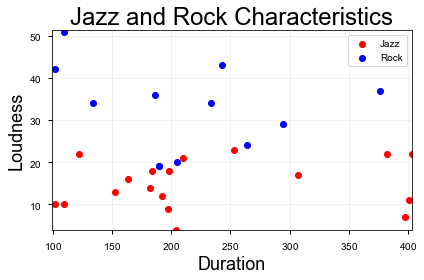

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]


# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:

neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0], dtype=int64)

In [4]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))


[1]
[[0.4 0.6]]


# DS_3_1_1 KNN Classifier, no weights

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


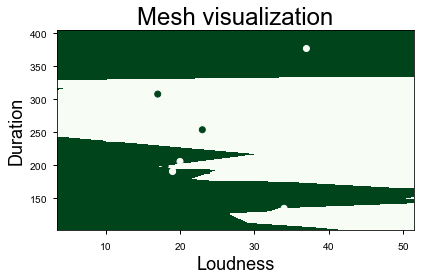

In [5]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .080

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Greens)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# DS_3_1_1 KNN Classifier Algorithm

In [6]:
#KNN Classifier Algorithm

data = music[['loudness', 'duration','jazz']]
print(data.head()) 
def ED(x1, x2, length): #it is used for calculating euclidean distance
    distance = 0
    for x in range(length):
        distance += np.square(x1[x] - x2[x])
    return np.sqrt(distance)
def knn(trainingSet, testInstance, k): #here we are defining our model
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    for x in range(len(trainingSet)):
        dist = ED(trainingSet.iloc[x],testInstance, length)
        distances[x] = dist[0]
    sortdist = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(sortdist[x][0])
    Votes = {} #to get most frequent class of rows
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in Votes:
            Votes[response] += 1
        else:
            Votes[response] = 1
    sortvotes = sorted(Votes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortvotes[0][0], neighbors)
testSet = [[24,190]]
test = pd.DataFrame(testSet)
k = 1
k1 = 5
result,neigh = knn(data, test, k)
result1,neigh1 = knn(data, test, k1)
print(result)
print(neigh)
print(result1)
print(neigh1)

   loudness  duration  jazz
0        18       184     1
1        34       134     0
2        43       243     0
3        36       186     0
4        22       122     1
0
[16]
1
[16, 25, 0, 21, 17]


# DS_3_1_2 KNN Classifier with Weights


DRILL:
Let's say we work at a credit card company and we're trying to figure out if people are going to pay their bills on time. We have everyone's purchases, split into four main categories: groceries, dining out, utilities, and entertainment. 

What are some ways you might use KNN to create this model? 
Use groceries, dining out, utilities, and entertainment as justification for classes: Buying groceries with credit card or utilities would be a yellow flag, a sign of financiall trouble.

What aspects of KNN would be useful? 
The scoring approach could be used to place credit card users into separate classes to monitor their risks.





C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


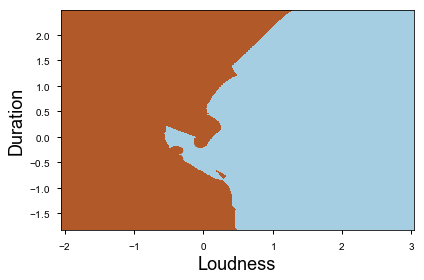

In [7]:


neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})

# Fit our model.
Y = music.jazz
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# DS_3_1_3 KNN Regressor

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


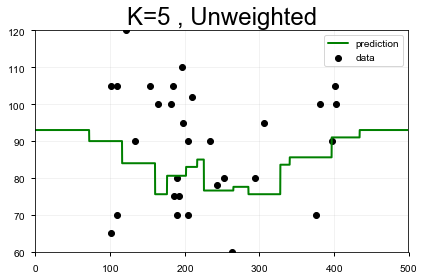

In [8]:



# Build our model.


d_n_neighbors = 5
neighbors
knn = KNeighborsRegressor(n_neighbors=d_n_neighbors)
X = music[['loudness', 'duration']]
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 500, 0.1)
S = np.array(T)
ll = pd.DataFrame()
ll['a'] = S
ll['b'] = S
X_axis = T[:, np.newaxis]


# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(ll)

#Plot
plt.scatter(X['duration'], Y, c='k', label='data')
plt.plot(X_axis, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=' + str(d_n_neighbors) + ' , Unweighted')
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


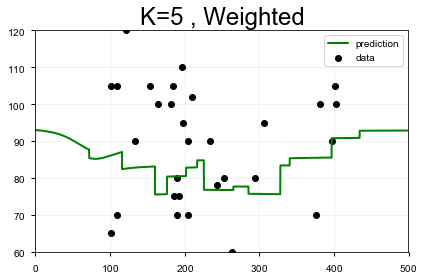

In [9]:

# Run the same model, this time with weights.
d_n_neighbors = 5
knn_w = KNeighborsRegressor(n_neighbors=d_n_neighbors, weights='distance')
X = music[['loudness', 'duration']]
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 500, 0.1)
S = np.array(T)
ll = pd.DataFrame()
ll['a'] = S
ll['b'] = S
X_axis = T[:, np.newaxis]

#Predict
Y_ = knn_w.predict(ll)

#Plot
plt.scatter(X['duration'], Y, c='k', label='data')
plt.plot(X_axis, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=' + str(d_n_neighbors) + ' , Weighted')
plt.show()

In [10]:

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.75 (+/- 1.16)
Weighted Accuracy: -0.51 (+/- 1.24)
